In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [2]:
import os
# Get the current working directory
current_dir = os.getcwd()
# Navigate to the parent folder
parent_dir = os.path.dirname(current_dir)


In [56]:
file_path = os.path.join(parent_dir, 'Final_Stock_Table.csv')
stock_df = pd.read_csv(file_path)
#text_df = pd.read_csv('New_turns.csv')
file_path = os.path.join(parent_dir, 'EPS_data.csv')
eps_df = pd.read_csv(file_path)

## Dropping irrelevant columns and adjusting column types

In [57]:
stock_df = stock_df.drop(columns=['XML_Event','XML_Event_EventStory','XML_Event_EventStory_Id','XML_Event_Id',
                                  'XML_Event_lastUpdate','XML_Event_eventTypeId', 'XML_Event_eventTypeName', 'busdesc:1',
                                  'gsector:1', 'tic:1', 'conm:1', 'gvkey:1', 'datadate:1', 'XML_Event_EventStory_action',
                                  'XML_Event_EventStory_storyType','XML_Event_EventStory_version', 'TickerPrefix',
                                  'iid', 'XML_Event_companyTicker', 'conm', 'formatted_startDate', 'busdesc',
                                  'indfmt', 'consol', 'popsrc', 'datafmt', 'curcdq', 'rdq',
                                  'XML_Event_EventStory_expirationDate', 'XML_Event_EventStory_Body',
                                  'XML_Event_EventStory_Headline'], 
                                  axis=1)


In [58]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140407 entries, 0 to 140406
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Doc_id                 140407 non-null  int64  
 1   XML_Event_eventTitle   140407 non-null  object 
 2   XML_Event_city         132729 non-null  object 
 3   XML_Event_companyName  140407 non-null  object 
 4   XML_Event_startDate    140407 non-null  object 
 5   gvkey                  140407 non-null  int64  
 6   datadate               140407 non-null  object 
 7   tic                    140407 non-null  object 
 8   cshoc                  140376 non-null  float64
 9   eps                    133917 non-null  float64
 10  prccd                  140407 non-null  float64
 11  prcod                  140059 non-null  float64
 12  trfd                   101235 non-null  float64
 13  ggroup                 140406 non-null  float64
 14  gsector                140406 non-nu

In [59]:
stock_df.describe()

,Doc_id,gvkey,cshoc,eps,prccd,prcod,trfd,ggroup,gsector,fyearq,...,rectq,req,revtq,saleq,spceq,xrdq,capxy,mkvaltq,prccq,gind
count,1.404070e+05,140407.000000,1.403760e+05,133917.000000,140407.000000,140059.000000,101235.000000,140406.000000,140406.000000,140407.000000,...,1.379430e+05,134986.000000,134150.000000,140288.000000,29529.000000,71211.00000,137629.000000,1.350360e+05,139795.000000,140406.000000
mean,8.442254e+06,72929.410364,2.046739e+08,1.180326,42.141958,42.216201,2.109132,3347.347051,33.295443,2015.600298,...,4.458020e+03,1743.800709,1272.915756,1267.155032,101.904752,65.25271,180.803477,8.947179e+03,41.602947,334762.809460
std,4.264723e+06,71600.227555,9.289260e+08,9.809716,80.070085,80.099527,4.261708,1316.276658,13.166837,3.829565,...,6.401133e+04,12204.402362,4874.090750,4858.732175,473.188387,355.18785,914.876076,4.309731e+04,78.555005,131625.812254
min,1.678286e+06,1004.000000,0.000000e+00,-998.260000,0.001700,0.001800,1.000000,1010.000000,10.000000,2008.000000,...,0.000000e+00,-133252.000000,-4423.855000,-4423.855000,-6008.524000,-6.85700,-3258.000000,8.000000e-03,0.001500,101010.000000
25%,4.937010e+06,14311.000000,2.882600e+07,-0.180000,9.990000,10.050000,1.023430,2030.000000,20.000000,2012.000000,...,2.688000e+01,-170.458750,54.668500,54.583000,0.189000,0.28500,1.623000,3.898243e+02,9.960000,203020.000000
50%,6.025432e+06,30671.000000,5.718900e+07,0.830000,23.700000,23.790000,1.244699,3510.000000,35.000000,2016.000000,...,1.271390e+02,53.634000,205.624500,198.736000,10.957000,6.00000,12.227000,1.406261e+03,23.450000,351030.000000
75%,1.263452e+07,147579.000000,1.363435e+08,2.340000,49.050000,49.170000,2.019165,4510.000000,45.000000,2019.000000,...,5.636000e+02,706.658000,742.785250,720.834500,55.015000,23.12650,65.625000,4.823616e+03,48.500000,451030.000000
max,1.523559e+07,347085.000000,5.443887e+10,888.530000,3599.920000,3627.750000,181.510155,6020.000000,60.000000,2022.000000,...,4.059652e+06,402089.000000,152871.000000,152871.000000,20999.900000,15313.00000,61053.000000,2.901645e+06,3440.160000,602010.000000


In [60]:
eps_df = eps_df.sort_values('STATPERS', ascending=False).drop_duplicates(['ANNDATS_ACT', 'TICKER'])

In [61]:
merged_df = stock_df.merge(eps_df, how='left', left_on=['TicPrefix', 'datadate'], right_on=['OFTIC', 'ANNDATS_ACT'])
merged_df_inner = stock_df.merge(eps_df, how='inner', left_on=['TicPrefix', 'datadate'], right_on=['OFTIC', 'ANNDATS_ACT'])

## Creating target variable and merging the final tables

In [62]:
file_path = os.path.join(parent_dir, 'factors.csv')
factors_df = pd.read_csv(file_path, low_memory=False)

In [63]:
factors_df = factors_df.drop_duplicates(subset=['gvkey', 'datadate'])

In [64]:
merged_df = merged_df.merge(factors_df, how='left', left_on=['gvkey','datadate'], right_on=['gvkey','datadate'])

In [65]:
merged_df['nonadjclose'] = merged_df['prccd']
merged_df['nonadjopen'] = merged_df['prcod']

merged_df['prccd'] = merged_df['prccd'] / merged_df['ajexdi']
merged_df['prcod'] = merged_df['prcod'] / merged_df['ajexdi']

In [66]:
# Convert 'datacqtr' to PeriodIndex with quarterly frequency
merged_df['datacqtr'] = pd.PeriodIndex(merged_df['datacqtr'], freq='Q')

# Sort the DataFrame by 'gvkey' and 'datacqtr'
merged_df.sort_values(by=['gvkey', 'datacqtr'], inplace=True)

# Group by 'gvkey' and shift 'prcod' to create 'Next_Quarter_Open'
merged_df['Next_Quarter_Open'] = merged_df.groupby('gvkey')['prcod'].shift(-1)
merged_df['Next_Quarter_Open_unadj'] = merged_df.groupby('gvkey')['nonadjopen'].shift(-1)

# Create a new column 'Next_Quarter' which is 'datacqtr' shifted up by one quarter
merged_df['Next_Quarter'] = merged_df.groupby('gvkey')['datacqtr'].shift(-1)

# Calculate the difference in quarters between 'Next_Quarter' and 'datacqtr'
merged_df['Quarter_Diff'] = (merged_df['Next_Quarter'].dt.year - merged_df['datacqtr'].dt.year) * 4 + merged_df['Next_Quarter'].dt.quarter - merged_df['datacqtr'].dt.quarter

# If 'Quarter_Diff' is not 1, set 'Next_Quarter_Open' to NaN
merged_df.loc[merged_df['Quarter_Diff'] != 1, 'Next_Quarter_Open'] = np.nan

# Calculate the percentage change
merged_df['Pct_Change_Next_Quarter'] = (merged_df['Next_Quarter_Open'] - merged_df['prccd']) / merged_df['prccd'] * 100

# Drop the 'Next_Quarter' and 'Quarter_Diff' columns
merged_df.drop(['Next_Quarter', 'Quarter_Diff'], axis=1, inplace=True)

In [67]:
conditions = [
    (merged_df['Pct_Change_Next_Quarter'] > 3), 
    (merged_df['Pct_Change_Next_Quarter'] < -3),
    (merged_df['Pct_Change_Next_Quarter'].isna()) 
]
choices = ['Buy', 'Sell', None]

conditions_bi = [
    (merged_df['Pct_Change_Next_Quarter'] >= 0), 
    (merged_df['Pct_Change_Next_Quarter'] < 0)
]
choices_bi = ['Buy', 'Sell']

merged_df['Target'] = np.select(conditions, choices, default='Hold')
merged_df['Target_binary'] = np.select(conditions_bi, choices_bi, default=None)

# Convert 'Target' and 'Target_binary' to categorical data type
merged_df['Target'] = merged_df['Target'].astype('category')
merged_df['Target_binary'] = merged_df['Target_binary'].astype('category')

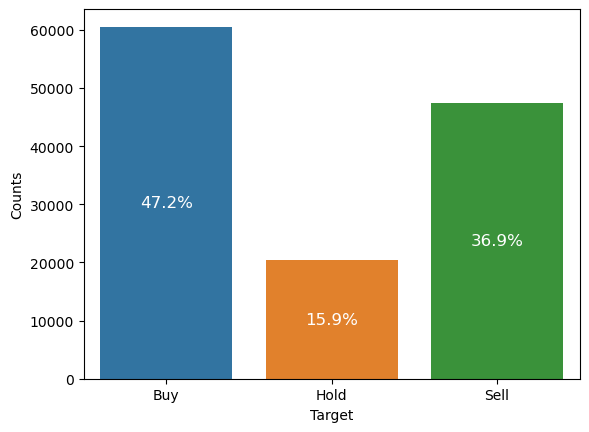

In [68]:
# Drop missing data
temp_df = merged_df.dropna(subset=['Target'])

# Calculate the counts and percentages of each category
target_counts = temp_df['Target'].value_counts().sort_index()
target_percentage = temp_df['Target'].value_counts(normalize=True).sort_index() * 100

# Create a bar plot for the counts
ax = sns.barplot(x=target_counts.index, y=target_counts.values)
ax.set_ylabel('Counts')

# Add the percentage values inside the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{target_percentage.values[i]:.1f}%',
            ha='center', va='center', color='white', fontsize=12)

plt.show()

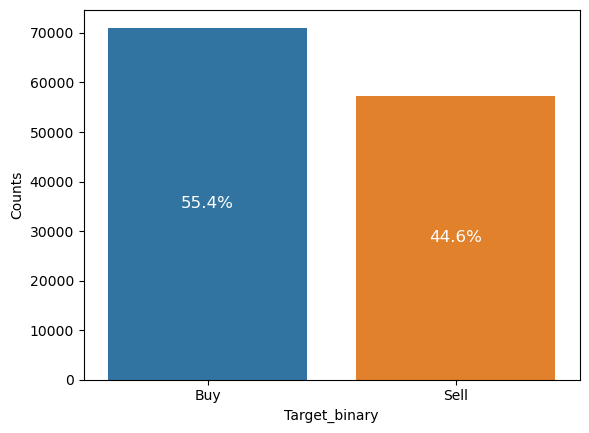

In [69]:
# Drop missing data
temp_df = merged_df.dropna(subset=['Target_binary'])

# Calculate the counts and percentages of each category
target_counts = temp_df['Target_binary'].value_counts()
target_percentage = temp_df['Target_binary'].value_counts(normalize=True) * 100

# Create a bar plot for the counts
ax = sns.barplot(x=target_counts.index, y=target_counts.values)
ax.set_ylabel('Counts')

# Add the percentage values inside the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{target_percentage.values[i]:.1f}%',
            ha='center', va='center', color='white', fontsize=12)

plt.show()

In [70]:
# Small constant to avoid division by zero
epsilon = 1e-7

# Creating Earnings Surprise column
merged_df['Earnings_Surprise_(%)'] = (merged_df['ACTUAL'] - merged_df['MEANEST']) / (abs(merged_df['MEANEST']) + epsilon) * 100
merged_df['Earnings_Surprise'] = merged_df['ACTUAL'] - merged_df['MEANEST']

In [71]:
file_path = os.path.join(parent_dir, 'Final_Num_Table.csv')
merged_df.to_csv(file_path, index=False)

In [72]:
stock_df = pd.read_csv(file_path)

C:\Users\Jiket\AppData\Local\Temp\ipykernel_968\3036630214.py:1: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  stock_df = pd.read_csv(file_path)


Transforming the category column

In [73]:
stock_df.loc[:, 'ggroup'] = stock_df['ggroup'].astype('category')
stock_df.loc[:, 'gsector'] = stock_df['gsector'].astype('category')
stock_df.loc[:, 'gind'] = stock_df['gind'].astype('category')
stock_df = stock_df.loc[stock_df['fqtr'].notna()]
stock_df.loc[:, 'fqtr'] = stock_df['fqtr'].astype(int)

In [74]:
# Sort the DataFrame by 'Ticker' and 'Quarter'
stock_df.sort_values(by=['gvkey', 'datafqtr'], inplace=True)

# Group by 'Ticker' and 'Quarter' and shift 'Open' to create 'Next_Quarter_Open'
stock_df.loc[:, 'Next_quarter_earnings'] = stock_df.groupby('gvkey')['ibq'].shift(-1)

In [75]:
# GICS Sector Codes
gics_sectors = {
    10: "Energy",
    15: "Materials",
    20: "Industrials",
    25: "Consumer Discretionary",
    30: "Consumer Staples",
    35: "Health Care",
    40: "Financials",
    45: "Information Technology",
    50: "Communication Services",
    55: "Utilities",
    60: "Real Estate"
}

# GICS Industry Group Codes
gics_industry_groups = {
    1010: "Energy",
    1510: "Materials",
    2010: "Capital Goods",
    2020: "Commercial & Professional Services",
    2030: "Transportation",
    2510: "Automobiles & Components",
    2520: "Consumer Durables & Apparel",
    2530: "Consumer Services",
    2540: "Media & Entertainment",
    2550: "Retailing",
    3010: "Food & Staples Retailing",
    3020: "Food, Beverage & Tobacco",
    3030: "Household & Personal Products",
    3510: "Health Care Equipment & Services",
    3520: "Pharmaceuticals, Biotechnology & Life Sciences",
    4010: "Banks",
    4020: "Diversified Financials",
    4030: "Insurance",
    4510: "Software & Services",
    4520: "Technology Hardware & Equipment",
    4530: "Semiconductors & Semiconductor Equipment",
    5010: "Telecommunication Services",
    5020: "Media & Entertainment",
    5510: "Utilities",
    6010: "Real Estate"
}

# GICS Industry Codes
gics_industries = {
    101010: "Energy Equipment & Services",
    101020: "Oil, Gas & Consumable Fuels",
    151010: "Chemicals",
    151020: "Construction Materials",
    151030: "Containers & Packaging",
    151040: "Metals & Mining",
    151050: "Paper & Forest Products",
    201010: "Aerospace & Defense",
    201020: "Building Products",
    201030: "Construction & Engineering",
    201040: "Electrical Equipment",
    201050: "Industrial Conglomerates",
    201060: "Machinery",
    201070: "Trading Companies & Distributors",
    202010: "Commercial Services & Supplies",
    202020: "Professional Services",
    203010: "Air Freight & Logistics",
    203020: "Passenger Airlines",
    203030: "Marine",
    203040: "Road & Rail",
    203050: "Transportation Infrastructure",
    251010: "Auto Components",
    251020: "Automobiles",
    252010: "Household Durables",
    252020: "Leisure Products",
    252030: "Textiles, Apparel & Luxury Goods",
    253010: "Hotels, Restaurants & Leisure",
    253020: "Diversified Consumer Services",
    254010: "Media",
    254020: "Entertainment",
    255010: "Retailing",
    301010: "Food & Staples Retailing",
    302010: "Food, Beverage & Tobacco",
    303010: "Household & Personal Products",
    351010: "Health Care Equipment & Supplies",
    351020: "Health Care Providers & Services",
    352010: "Pharmaceuticals",
    352020: "Biotechnology",
    352030: "Life Sciences Tools & Services",
    401010: "Banks",
    402010: "Diversified Financial Services",
    402020: "Consumer Finance",
    402030: "Capital Markets",
    402040: "Mortgage Real Estate Investment Trusts (REITs)",
    403010: "Insurance",
    451010: "Software",
    451020: "IT Services",
    451030: "Internet Software & Services",
    452010: "Technology Hardware, Storage & Peripherals",
    452020: "Electronic Equipment, Instruments & Components",
    452030: "Communications Equipment",
    452040: "Semiconductors & Semiconductor Equipment",
    501010: "Telecommunication Services",
    502010: "Media",
    502020: "Entertainment",
    551010: "Utilities",
    601010: "Equity Real Estate Investment Trusts (REITs)",
    601020: "Real Estate Management & Development"
}

In [76]:
stock_df['gsector'] = stock_df['gsector'].map(gics_sectors)
stock_df['ggroup'] = stock_df['ggroup'].map(gics_industry_groups)
stock_df['gind'] = stock_df['gind'].map(gics_industries)

Removing columns again, keeping only those used for linear regression and ml

In [77]:
ml_df = stock_df.drop(columns=['XML_Event_eventTitle', 'XML_Event_city', 'XML_Event_companyName', 'XML_Event_startDate',
                                'eps', 'trfd', 'TicPrefix', 'actq', 'epspxq', 'optrfrq', 'ppentq', 'rectq', 'req',
                               'saleq', 'spceq', 'xrdq', 'costat', 'TICKER', 'OFTIC', 'CNAME', 'MEASURE', 'FISCALP',
                               'FPI', 'ESTFLAG', 'MEDEST', 'STDEV', 'HIGHEST', 'NUMEST', 'LOWEST'], axis=1)

In [78]:
ml_df = ml_df.dropna(subset= ['datafqtr'])

# Merging with NLP outputs

In [79]:
file_path = os.path.join(parent_dir, 'Sentiment_scores.csv')
sentiment_df = pd.read_csv(file_path)
file_path = os.path.join(parent_dir, 'Buzzword_count.csv')
buzzword_df = pd.read_csv(file_path)

In [80]:
buzzword_df = buzzword_df.rename(columns={'Unnamed: 0': 'Doc_id'})
buzz_df = buzzword_df[['Doc_id', 'buzzcount']]

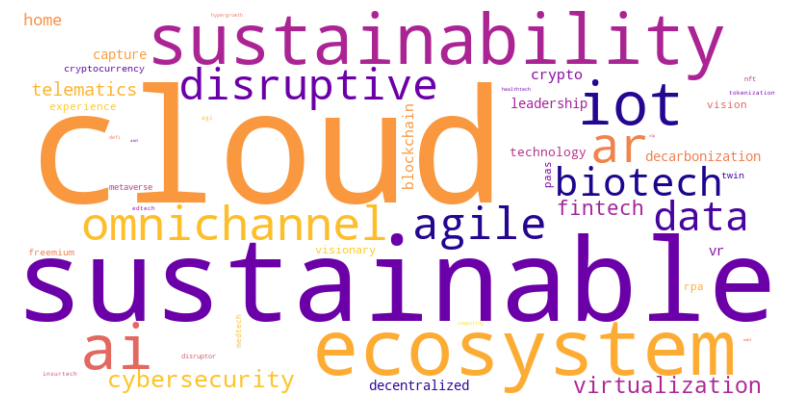

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop the id and sum columns
cloud_df = buzzword_df.drop(columns=['Doc_id', 'buzzcount'])

# Create a dictionary where keys are the words and values are the sums of the counts
word_counts = cloud_df.sum().to_dict()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color= 'white', colormap= 'plasma').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
merged_df = pd.merge(sentiment_df, buzz_df, on='Doc_id')
ml_df = pd.merge(merged_df, ml_df, on='Doc_id')

Finally calculating the Buzz-score

In [83]:
# Convert 'datacqtr' to datetime
ml_df['datacqtr'] = pd.PeriodIndex(ml_df['datacqtr'], freq='Q')

# Set 'datacqtr' as the index and sort it
ml_df.set_index('datacqtr', inplace=True)
ml_df.sort_index(inplace=True)

# Group by 'gsector' and 'datacqtr', and calculate the mean 'buzzcount' for each group
mean_buzzcount = ml_df.groupby(['gsector', 'datacqtr'])['buzzcount'].mean()

# Shift the mean 'buzzcount' by one quarter for each 'gsector'
mean_buzzcount_shifted = mean_buzzcount.groupby('gsector').shift()

# Reset the index of 'mean_buzzcount_shifted'
mean_buzzcount_shifted = mean_buzzcount_shifted.reset_index()

# Merge 'ml_df' and 'mean_buzzcount_shifted' on ['gsector', 'datacqtr']
ml_df = pd.merge(ml_df.reset_index(), mean_buzzcount_shifted, on=['gsector', 'datacqtr'], how='left')

# Calculate the 'buzzscore'
ml_df['buzzscore'] = np.where(pd.notnull(ml_df['buzzcount_y']) & ml_df['buzzcount_y'] != 0, ml_df['buzzcount_x'] / ml_df['buzzcount_y'], ml_df['buzzcount_x'])

In [84]:
ml_df = ml_df.drop(columns=['buzzcount_y'])
ml_df = ml_df.rename(columns={'buzzcount_x': 'buzzcount'})

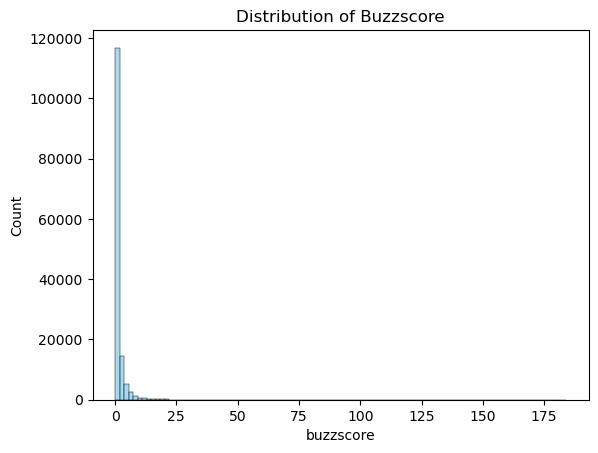

In [85]:
# Create a histogram
sns.histplot(data=ml_df, x='buzzscore', kde=False, bins=100, color='skyblue')
plt.title('Distribution of Buzzscore')
plt.show()

Modifying the sentiment

In [86]:
sentiment_categories = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 
                             'Strong_Modal', 'Weak_Modal', 'Constraining']

In [87]:
import ast

# Convert the string to a dictionary
ml_df['counts'] = ml_df['counts'].apply(ast.literal_eval)

# Assuming the keys in the dictionary are known
keys = list(ml_df['counts'].iloc[0].keys())

# Create a new column for each key
for key in keys:
    ml_df[f'{key}_count'] = ml_df['counts'].apply(lambda x: x.get(key, 0))

# Drop the 'counts' column
ml_df = ml_df.drop(columns=['counts'])

In [88]:
ml_df['Sentiment'] = ml_df[sentiment_categories].idxmax(axis=1)

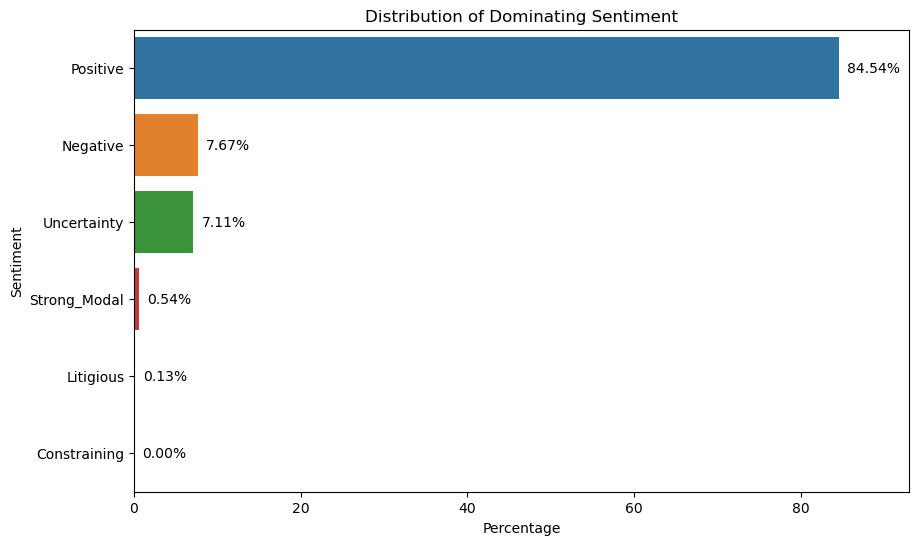

In [89]:
# Calculate the percentages of each unique value in the 'Sentiment' column
sentiment_percentages = ml_df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y=sentiment_percentages.index, x=sentiment_percentages.values, orient='h')

# Set the title and labels
plt.title('Distribution of Dominating Sentiment')
plt.xlabel('Percentage')
plt.ylabel('Sentiment')

# Display the exact percentages on the bars
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 1,  # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2,  # vertical alignment is middle of the bar
             '{:1.2f}%'.format(width),  # format the value
             ha = 'left',   # horizontal alignment is left
             va = 'center')  # vertical alignment is center

# Adjust the x-limits to make room for the labels
plt.xlim(0, max(sentiment_percentages.values) * 1.1)

# Show the plot
plt.show()

In [90]:
file_path = os.path.join(parent_dir, 'Final_ML_Table.csv')
ml_df.to_csv(file_path, index=False)

# EDA on ML data focus on Buzzword measures and sentiment

In [3]:
file_path = os.path.join(parent_dir, 'Final_ML_Table.csv')
ml_df = pd.read_csv(file_path)

In [31]:
# Dropping rows where imputation is not possible
clean_df = ml_df.dropna(subset=['ACTUAL', 'ggroup', 'Target_binary', 'Earnings_Surprise', 'mkvaltq', 'cshoc']).copy()
# Imputing mean for the rest of the missing values for columns atq and ibq based on the ggroup
clean_df.loc[:,['atq', 'ibq']] = clean_df.groupby('ggroup')[['atq', 'ibq']].transform(lambda x: x.fillna(x.mean()))
# Computing market cap
clean_df['market_cap'] = clean_df['cshoc'] * clean_df['prccd']
# Scaling next quarter earnings by market cap
clean_df.loc[:,'Scaled_nextq_earnings'] = clean_df.loc[:,'Next_quarter_earnings'] / clean_df.loc[:,'market_cap']
# Creating an interaction term between positive and negative sentiment and buzzscore
clean_df.loc[:,'Positive_buzzscore'] = clean_df.loc[:,'Positive'] * clean_df.loc[:,'buzzscore']
clean_df.loc[:,'Negative_buzzscore'] = clean_df.loc[:,'Negative'] * clean_df.loc[:,'buzzscore']
# Creating an interaction term between buzzscore and Positive and Negative Counts
clean_df.loc[:,'Positive_buzzscore_count'] = clean_df.loc[:,'Positive_count'] * clean_df.loc[:,'buzzscore']
clean_df.loc[:,'Negative_buzzscore_count'] = clean_df.loc[:,'Negative_count'] * clean_df.loc[:,'buzzscore']
# Creating all the same interaction terms but with buzzcount instead of buzzscore
clean_df.loc[:,'Positive_buzzcount'] = clean_df.loc[:,'Positive'] * clean_df.loc[:,'buzzcount']
clean_df.loc[:,'Negative_buzzcount'] = clean_df.loc[:,'Negative'] * clean_df.loc[:,'buzzcount']
clean_df.loc[:,'Positive_buzzcount_count'] = clean_df.loc[:,'Positive_count'] * clean_df.loc[:,'buzzcount']
clean_df.loc[:,'Negative_buzzcount_count'] = clean_df.loc[:,'Negative_count'] * clean_df.loc[:,'buzzcount']

# Adjust 'market_cap' to be counted in millions
clean_df['market_cap'] = clean_df['market_cap'] / 1_000_000

In [32]:
# Remove 2009Q1 and 2022Q2 data
clean_df = clean_df[(clean_df['datacqtr'] != '2009Q1') & (clean_df['datacqtr'] != '2022Q2')]

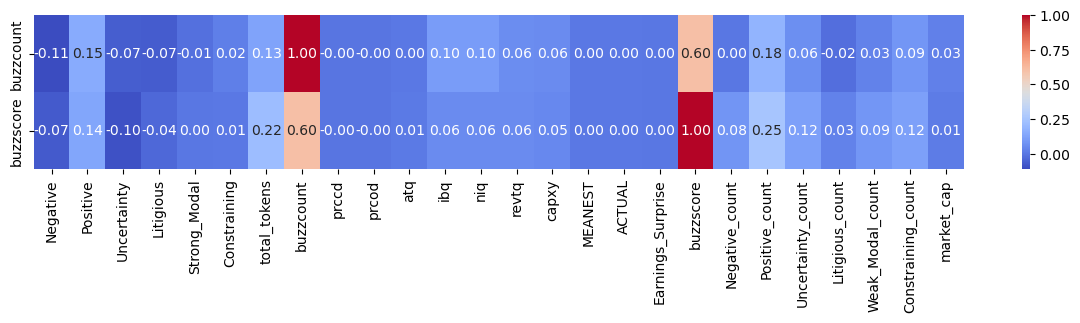

In [94]:
selected_columns = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Constraining', 'total_tokens', 
                    'buzzcount', 'prccd', 'prcod', 'atq', 'ibq', 'niq', 'revtq', 'capxy', 'MEANEST', 
                    'ACTUAL', 'Earnings_Surprise', 'buzzscore', 'Negative_count', 'Positive_count', 'Uncertainty_count', 
                    'Litigious_count', 'Weak_Modal_count','Constraining_count', 'market_cap']
selected_df = clean_df[selected_columns]

# Compute the correlation matrix for the selected columns
corr_matrix = selected_df.corr()

# Select only 'buzzcount' and 'buzzscore' for the y-axis
corr_matrix_subset = corr_matrix.loc[['buzzcount', 'buzzscore']]

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 2))

# Create a heatmap
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [95]:
selected_columns = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Constraining', 'total_tokens', 
                     'prccd', 'prcod', 'atq', 'ibq', 'niq', 'revtq', 'market_cap',
                    'Earnings_Surprise', 'Negative_count', 'Positive_count', 'Uncertainty_count', 
                    'Litigious_count', 'Weak_Modal_count','Constraining_count']



# Split the DataFrame into two groups based on whether 'buzzcount' is 0 or more than 0
zero_buzzcount = clean_df[clean_df['buzzcount'] == 0][selected_columns]
more_than_zero_buzzcount = clean_df[clean_df['buzzcount'] > 0][selected_columns]

# Split based on median buzzscore
median_buzzscore = clean_df['buzzscore'].median()
low_buzzscore = clean_df[clean_df['buzzscore'] <= median_buzzscore][selected_columns]
high_buzzscore = clean_df[clean_df['buzzscore'] > median_buzzscore][selected_columns]

# Compute the means of the selected columns for each group
zero_buzzcount_means = zero_buzzcount.mean()
more_than_zero_buzzcount_means = more_than_zero_buzzcount.mean()
low_buzzscore_means = low_buzzscore.mean()
high_buzzscore_means = high_buzzscore.mean()

# Compare the means
means_comparison = pd.DataFrame({'Zero Buzzcount': zero_buzzcount_means, 
                                 'More Than Zero Buzzcount': more_than_zero_buzzcount_means,
                                 'Low Buzzscore': low_buzzscore_means, 
                                 'High Buzzscore': high_buzzscore_means})

# Calculate the differences between the means
differences_buzzcount = more_than_zero_buzzcount_means - zero_buzzcount_means
differences_buzzscore = high_buzzscore_means - low_buzzscore_means

# Add the differences to the comparison DataFrame
means_comparison['Difference Buzzcount'] = differences_buzzcount
means_comparison['Difference Buzzscore'] = differences_buzzscore

print(means_comparison)

                    Zero Buzzcount  More Than Zero Buzzcount  Low Buzzscore  \
Negative                  0.178451                  0.161317       0.178451   
Positive                  0.377806                  0.425970       0.377806   
Uncertainty               0.194731                  0.178584       0.194731   
Litigious                 0.038049                  0.032073       0.038049   
Strong_Modal              0.129208                  0.126290       0.129208   
Constraining              0.030311                  0.031089       0.030311   
total_tokens            135.074590                161.226801     135.074590   
prccd                   294.729053                102.369635     294.729053   
prcod                   298.045263                104.401759     298.045263   
atq                   17663.230140              18258.066750   17663.230140   
ibq                     102.840945                175.969338     102.840945   
niq                     104.469505                17

In [96]:
# Format the numbers to a more readable format
means_comparison_formatted = means_comparison.applymap('{:,.3f}'.format)

print(means_comparison_formatted)

                   Zero Buzzcount More Than Zero Buzzcount Low Buzzscore  \
Negative                    0.178                    0.161         0.178   
Positive                    0.378                    0.426         0.378   
Uncertainty                 0.195                    0.179         0.195   
Litigious                   0.038                    0.032         0.038   
Strong_Modal                0.129                    0.126         0.129   
Constraining                0.030                    0.031         0.030   
total_tokens              135.075                  161.227       135.075   
prccd                     294.729                  102.370       294.729   
prcod                     298.045                  104.402       298.045   
atq                    17,663.230               18,258.067    17,663.230   
ibq                       102.841                  175.969       102.841   
niq                       104.470                  178.320       104.470   
revtq       

In [6]:
temp = clean_df.drop_duplicates(subset='gvkey', keep='first')

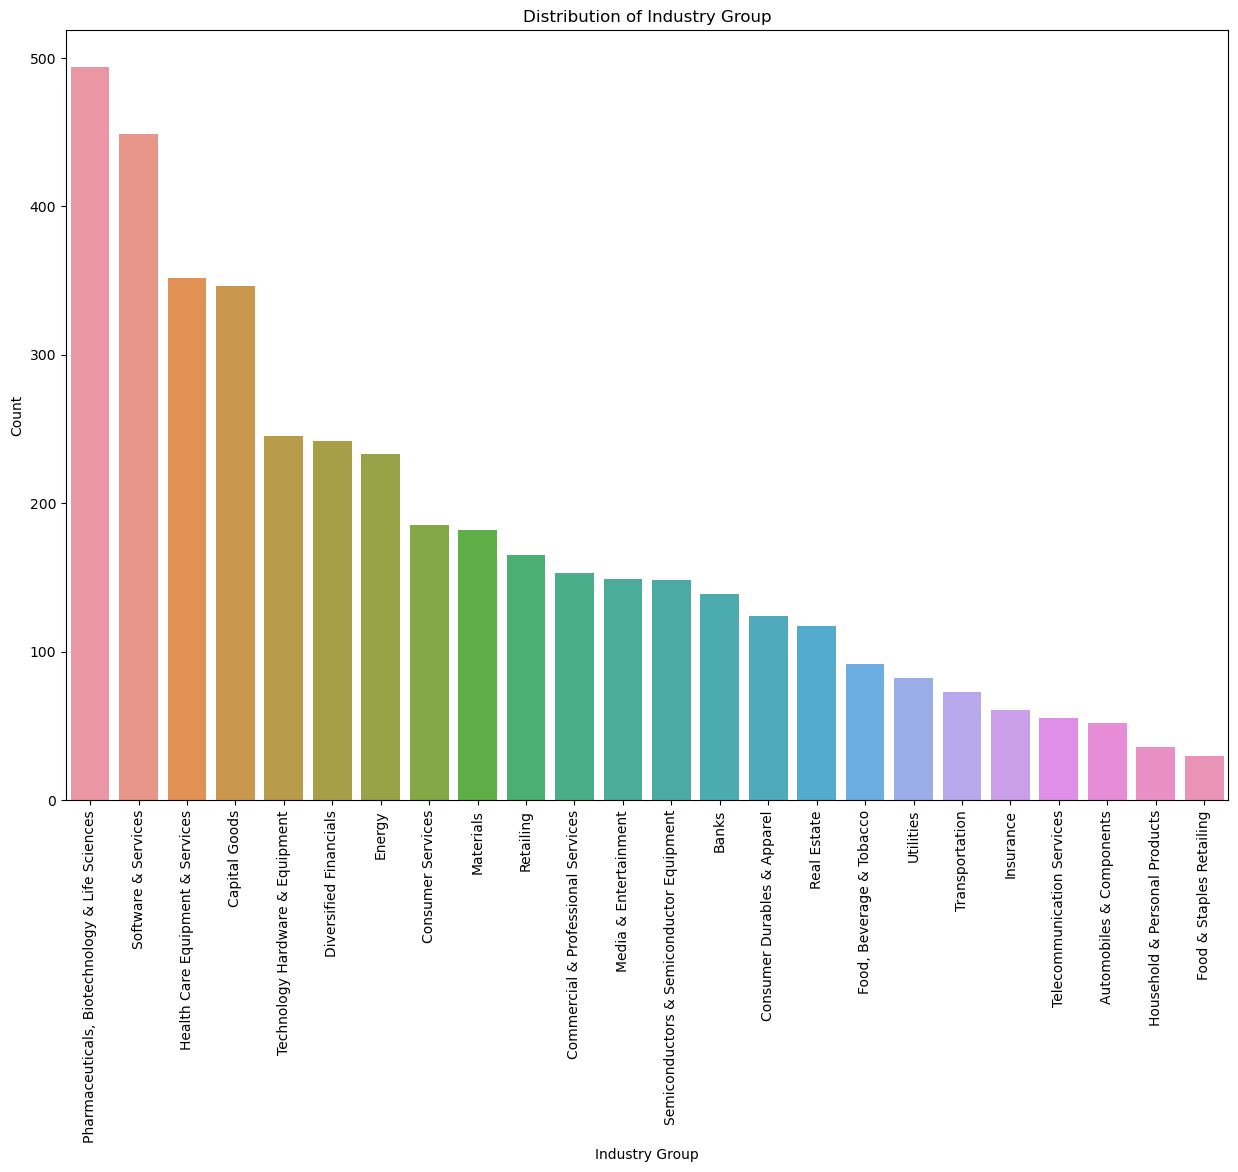

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the distribution
distribution = temp['ggroup'].value_counts()

# Create a DataFrame from the distribution
df_distribution = pd.DataFrame({'ggroup': distribution.index, 'count': distribution.values})

# Create a bar plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.barplot(x='ggroup', y='count', data=df_distribution)

# Add labels and title
plt.xlabel('Industry Group')
plt.ylabel('Count')
plt.title('Distribution of Industry Group')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

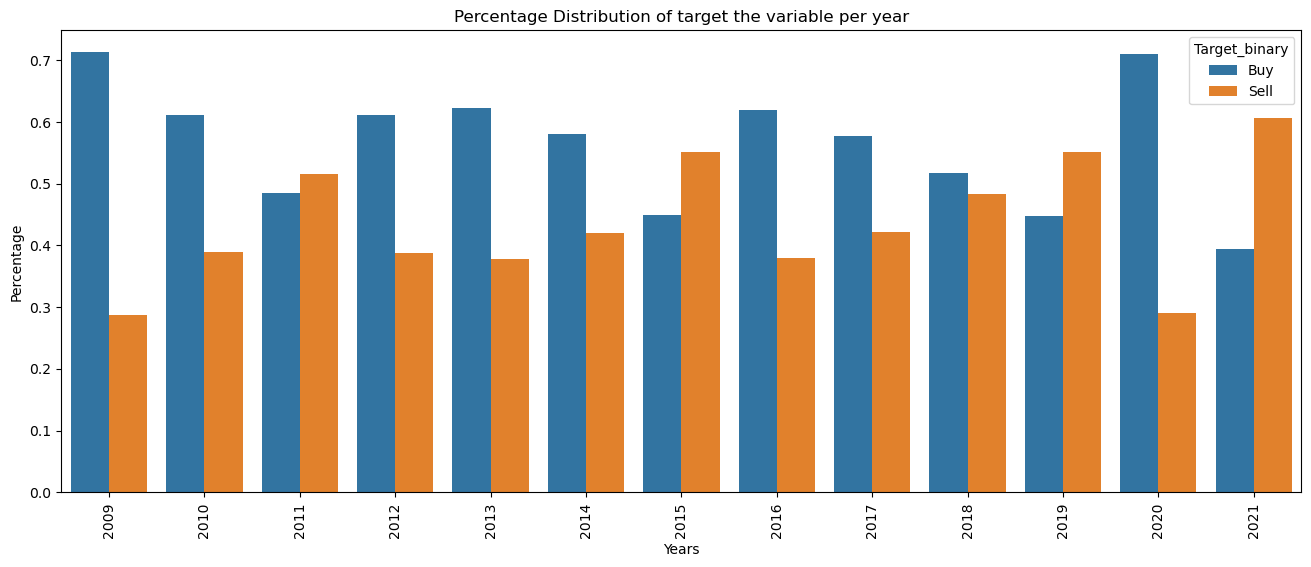

In [40]:
def transform_datecqtr_to_year(datecqtr):
    # Assuming datecqtr is in the format 'yyyyQq'
    year = datecqtr[:4]  # Extract the year part
    return int(year)  # Convert to integer

# Apply the function to the 'datacqtr' column
temp_df = clean_df.copy()
temp_df['datacqtr'] = temp_df['datacqtr'].apply(transform_datecqtr_to_year)

# Drop 2022 as it only has one quarter
temp_df = temp_df[temp_df['datacqtr'] != 2022]

# Get the distribution of Target_binary per datacqtr
dist_target_per_datacqtr = temp_df.groupby('datacqtr')['Target_binary'].value_counts()

# Reset the index of the series to convert it into a DataFrame
df_target = dist_target_per_datacqtr.reset_index(name='count')

# Rename the columns
df_target.columns = ['datacqtr', 'Target_binary', 'count']

# Calculate the percentage of each Target_binary value for each quarter
total_per_datacqtr = temp_df['datacqtr'].value_counts()
df_target['percentage'] = df_target.apply(lambda row: row['count'] / total_per_datacqtr[row['datacqtr']], axis=1)

# Create a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x='datacqtr', y='percentage', hue='Target_binary', data=df_target)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of target the variable per year')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()